<a href="https://colab.research.google.com/github/mohammed21kamall/Graduation-Project/blob/main/Model%20AI/probabilityOfAllUsersWithAllGenres_(3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ratings = pd.read_csv("drive/MyDrive/Dataset2/ratings.csv")
movies = pd.read_csv("drive/MyDrive/Dataset2/movies.csv")

In [3]:
ratings.columns

Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

In [4]:
movies.columns

Index(['movieId', 'title', 'genres'], dtype='object')

In [5]:
movies_ratings = pd.merge(ratings, movies, on="movieId")

In [6]:
movies_ratings.columns

Index(['userId', 'movieId', 'rating', 'timestamp', 'title', 'genres'], dtype='object')

In [7]:
movies_ratings.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [8]:
movies_ratings = movies_ratings[['userId', 'movieId', 'genres', 'rating']]

In [9]:
movies_ratings.columns

Index(['userId', 'movieId', 'genres', 'rating'], dtype='object')

In [10]:
movies_ratings.head()

,userId,movieId,genres,rating
0,1,1,Adventure|Animation|Children|Comedy|Fantasy,4.0
1,5,1,Adventure|Animation|Children|Comedy|Fantasy,4.0
2,7,1,Adventure|Animation|Children|Comedy|Fantasy,4.5
3,15,1,Adventure|Animation|Children|Comedy|Fantasy,2.5
4,17,1,Adventure|Animation|Children|Comedy|Fantasy,4.5


In [11]:
movies_ratings = movies_ratings.sort_values(by='userId', ascending=True)

In [12]:
movies_ratings.head()

,userId,movieId,genres,rating
0,1,1,Adventure|Animation|Children|Comedy|Fantasy,4.0
12117,1,2389,Crime|Horror|Thriller,2.0
12126,1,2395,Comedy|Drama,5.0
12182,1,2406,Action|Adventure|Comedy|Romance,4.0
776,1,70,Action|Comedy|Horror|Thriller,3.0


In [13]:
movies_ratings['genres'] = movies_ratings['genres'].str.split('|')
movies_ratings.head()

,userId,movieId,genres,rating
0,1,1,"[Adventure, Animation, Children, Comedy, Fantasy]",4.0
12117,1,2389,"[Crime, Horror, Thriller]",2.0
12126,1,2395,"[Comedy, Drama]",5.0
12182,1,2406,"[Action, Adventure, Comedy, Romance]",4.0
776,1,70,"[Action, Comedy, Horror, Thriller]",3.0


In [14]:
n_movies = movies_ratings['movieId'].nunique()
n_users = movies_ratings['userId'].nunique()

print(f"Number of unique movieId's: {n_movies}")
print(f"Number of unique users: {n_users}")

Number of unique movieId's: 9724
Number of unique users: 610


In [15]:
movie_stats = ratings.groupby('userId')['movieId'].agg(['count'])
movie_stats.head()

,count
userId,
1,232
2,29
3,39
4,216
5,44


In [16]:
# للوصول إلى قيمة العدد للمستخدم ذي الـ userId المحدد
user_id = 5
count_for_user = movie_stats.loc[user_id, 'count']
print(f"The count for user {user_id} is: {count_for_user}")


The count for user 5 is: 44


In [17]:
# قم بتحويل البيانات إلى قاموس
user_movie_dict = {}

for user_id, count_for_user in movie_stats.iterrows():
    user_movie_dict[user_id] = count_for_user['count']

# طباعة النتائج لجميع المستخدمين
for user_id, count_for_user in user_movie_dict.items():
    print(f"The count for user {user_id} is: {count_for_user}")

The count for user 1 is: 232
The count for user 2 is: 29
The count for user 3 is: 39
The count for user 4 is: 216
The count for user 5 is: 44
The count for user 6 is: 314
The count for user 7 is: 152
The count for user 8 is: 47
The count for user 9 is: 46
The count for user 10 is: 140
The count for user 11 is: 64
The count for user 12 is: 32
The count for user 13 is: 31
The count for user 14 is: 48
The count for user 15 is: 135
The count for user 16 is: 98
The count for user 17 is: 105
The count for user 18 is: 502
The count for user 19 is: 703
The count for user 20 is: 242
The count for user 21 is: 443
The count for user 22 is: 119
The count for user 23 is: 121
The count for user 24 is: 110
The count for user 25 is: 26
The count for user 26 is: 21
The count for user 27 is: 135
The count for user 28 is: 570
The count for user 29 is: 81
The count for user 30 is: 34
The count for user 31 is: 50
The count for user 32 is: 102
The count for user 33 is: 156
The count for user 34 is: 86
The c

In [18]:
# استخدام user_id للحصول على قيمة المستخدم في القاموس
target_user_id = 2000

if target_user_id in user_movie_dict:
    count_for_target_user = user_movie_dict[target_user_id]
    print(f"The count for user {target_user_id} is: {count_for_target_user}")
else:
    print(f"المستخدم {target_user_id} لم يقم بتقييم أي أفلام.")

المستخدم 2000 لم يقم بتقييم أي أفلام.


In [19]:
# تفجير القائمة في عمود 'genres'
exploded_ratings = movies_ratings.explode('genres')

# استخدام groupby لتجميع البيانات بناءً على 'userId' و 'genres'، ثم حساب حجم كل مجموعة
user_genre_counts = exploded_ratings.groupby(['userId', 'genres']).size().reset_index(name='No.Of Frequency')

# طباعة النتائج
user_genre_counts.head()


,userId,genres,No.Of Frequency
0,1,Action,90
1,1,Adventure,85
2,1,Animation,29
3,1,Children,42
4,1,Comedy,83


In [20]:
from collections import Counter

genre_frequency = Counter(g for genres in movies_ratings['genres'] for g in genres)

print(f"There are {len(genre_frequency)} genres.")

genre_frequency

There are 20 genres.


Counter({'Adventure': 24161,
         'Animation': 6988,
         'Children': 9208,
         'Comedy': 39053,
         'Fantasy': 11834,
         'Crime': 16681,
         'Horror': 7291,
         'Thriller': 26452,
         'Drama': 41928,
         'Action': 30635,
         'Romance': 18124,
         'Mystery': 7674,
         'War': 4859,
         'Sci-Fi': 17243,
         'Western': 1930,
         'Musical': 4138,
         'Film-Noir': 870,
         'Documentary': 1219,
         'IMAX': 4145,
         '(no genres listed)': 47})

In [21]:
print("The 5 most common genres: \n", genre_frequency.most_common(5))

The 5 most common genres: 
 [('Drama', 41928), ('Comedy', 39053), ('Action', 30635), ('Thriller', 26452), ('Adventure', 24161)]


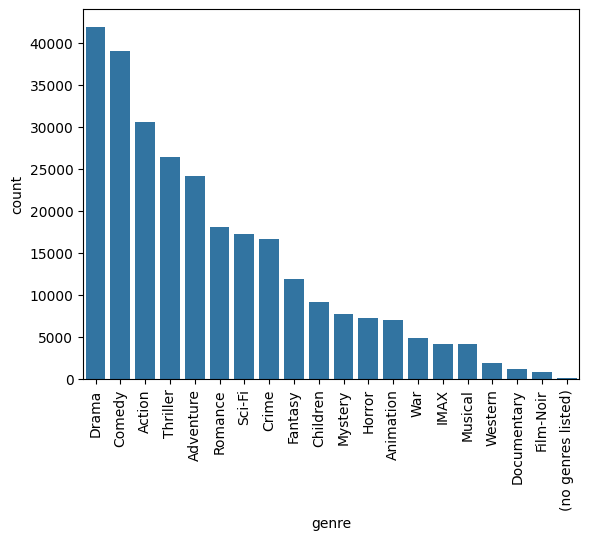

In [22]:
genre_frequency_df = pd.DataFrame([genre_frequency]).T.reset_index()
genre_frequency_df.columns = ['genre', 'count']

sns.barplot(x='genre', y='count', data=genre_frequency_df.sort_values(by='count', ascending=False))
plt.xticks(rotation=90)
plt.show()

In [23]:
# قم بتحديد المستخدم
user_id_to_find = 2

# قم بالتكرار على كل الـ genres الممكنة
for genre_to_find in user_genre_counts['genres'].unique():
    # استخدم عملية الاستعلام للعثور على القيمة واستخراج القيمة بدلاً من القائمة
    frequency_value = user_genre_counts.query(f'userId == {user_id_to_find} and genres == "{genre_to_find}"')['No.Of Frequency'].values
    number_of_times = frequency_value[0] if len(frequency_value) > 0 else 0
    # قم بطباعة القيمة

    print(f"The No.Of Frequency for user '{user_id_to_find}' and genre '{genre_to_find}' is: [{number_of_times}]")


The No.Of Frequency for user '2' and genre 'Action' is: [11]
The No.Of Frequency for user '2' and genre 'Adventure' is: [3]
The No.Of Frequency for user '2' and genre 'Animation' is: [0]
The No.Of Frequency for user '2' and genre 'Children' is: [0]
The No.Of Frequency for user '2' and genre 'Comedy' is: [7]
The No.Of Frequency for user '2' and genre 'Crime' is: [10]
The No.Of Frequency for user '2' and genre 'Drama' is: [17]
The No.Of Frequency for user '2' and genre 'Fantasy' is: [0]
The No.Of Frequency for user '2' and genre 'Film-Noir' is: [0]
The No.Of Frequency for user '2' and genre 'Horror' is: [1]
The No.Of Frequency for user '2' and genre 'Musical' is: [0]
The No.Of Frequency for user '2' and genre 'Mystery' is: [2]
The No.Of Frequency for user '2' and genre 'Romance' is: [1]
The No.Of Frequency for user '2' and genre 'Sci-Fi' is: [4]
The No.Of Frequency for user '2' and genre 'Thriller' is: [10]
The No.Of Frequency for user '2' and genre 'War' is: [1]
The No.Of Frequency for 

In [24]:
# قم بتكوين القاموس لتخزين النتائج
user_genre_dict = {}

# قم بالتكرار على كل الـ genres الممكنة وكل المستخدمين
for user_id, genre, number_of_times in user_genre_counts.itertuples(index=False):
    # استخدم الزوج (user_id, genre) كمفتاح للقاموس و `No.Of Frequency` كقيمة.
    user_genre_dict[(user_id, genre)] = number_of_times

# طباعة النتائج في القاموس
for (user_id, genre), number_of_times in user_genre_dict.items():
    print(f"The No.Of Frequency for user '{user_id}' and genre '{genre}' is: [{number_of_times}]")

Streaming output truncated to the last 5000 lines.
The No.Of Frequency for user '306' and genre 'Western' is: [2]
The No.Of Frequency for user '307' and genre 'Action' is: [159]
The No.Of Frequency for user '307' and genre 'Adventure' is: [153]
The No.Of Frequency for user '307' and genre 'Animation' is: [45]
The No.Of Frequency for user '307' and genre 'Children' is: [94]
The No.Of Frequency for user '307' and genre 'Comedy' is: [518]
The No.Of Frequency for user '307' and genre 'Crime' is: [140]
The No.Of Frequency for user '307' and genre 'Documentary' is: [5]
The No.Of Frequency for user '307' and genre 'Drama' is: [341]
The No.Of Frequency for user '307' and genre 'Fantasy' is: [107]
The No.Of Frequency for user '307' and genre 'Film-Noir' is: [5]
The No.Of Frequency for user '307' and genre 'Horror' is: [138]
The No.Of Frequency for user '307' and genre 'IMAX' is: [17]
The No.Of Frequency for user '307' and genre 'Musical' is: [48]
The No.Of Frequency for user '307' and genre 'My

In [42]:
user_genre_dict

{'Action': 90,
 'Adventure': 85,
 'Animation': 29,
 'Children': 42,
 'Comedy': 83,
 'Crime': 45,
 'Drama': 68,
 'Fantasy': 47,
 'Film-Noir': 1,
 'Horror': 17,
 'Musical': 22,
 'Mystery': 18,
 'Romance': 26,
 'Sci-Fi': 40,
 'Thriller': 55,
 'War': 22,
 'Western': 7}

In [25]:
# قم بتحديد المستخدم
user_id_to_find = 1

# قم بتكوين القاموس لتخزين النتائج
user_genre_dict = {}

# قم بالتكرار على كل الـ genres الممكنة للمستخدم المحدد
for genre_to_find, number_of_times in user_genre_counts.query(f'userId == {user_id_to_find}').loc[:, ['genres', 'No.Of Frequency']].itertuples(index=False):
    # استخدم القيمة (genre) كمفتاح للقاموس و `No.Of Frequency` كقيمة.
    user_genre_dict[genre_to_find] = number_of_times

# طباعة النتائج في القاموس
for genre, number_of_times in user_genre_dict.items():
    print(f"The No.Of Frequency for user '{user_id_to_find}' and genre '{genre}' is: [{number_of_times}]")

The No.Of Frequency for user '1' and genre 'Action' is: [90]
The No.Of Frequency for user '1' and genre 'Adventure' is: [85]
The No.Of Frequency for user '1' and genre 'Animation' is: [29]
The No.Of Frequency for user '1' and genre 'Children' is: [42]
The No.Of Frequency for user '1' and genre 'Comedy' is: [83]
The No.Of Frequency for user '1' and genre 'Crime' is: [45]
The No.Of Frequency for user '1' and genre 'Drama' is: [68]
The No.Of Frequency for user '1' and genre 'Fantasy' is: [47]
The No.Of Frequency for user '1' and genre 'Film-Noir' is: [1]
The No.Of Frequency for user '1' and genre 'Horror' is: [17]
The No.Of Frequency for user '1' and genre 'Musical' is: [22]
The No.Of Frequency for user '1' and genre 'Mystery' is: [18]
The No.Of Frequency for user '1' and genre 'Romance' is: [26]
The No.Of Frequency for user '1' and genre 'Sci-Fi' is: [40]
The No.Of Frequency for user '1' and genre 'Thriller' is: [55]
The No.Of Frequency for user '1' and genre 'War' is: [22]
The No.Of Fre

In [26]:
user_id_to_find = 1
genre_to_find = 'Drama'

# استخدم عملية الاستعلام للعثور على القيمة واستخراج القيمة بدلاً من القائمة
frequency_value = user_genre_counts.query(f'userId == {user_id_to_find} and genres == "{genre_to_find}"')['No.Of Frequency'].values
number_of_times = frequency_value[0] if len(frequency_value) > 0 else 0

# طباعة النتائج
print(f"The No.Of Frequency for user '{user_id_to_find}' and genre '{genre_to_find}' is: [{number_of_times}]")

The No.Of Frequency for user '1' and genre 'Drama' is: [68]


In [27]:
def user_behavior_probability(total_movies, genre_label_count):
    user_behavior_prob = genre_label_count / total_movies
    return round(user_behavior_prob, 3)


In [28]:
user_behavior_probability(70, 4)

0.057

In [29]:
# قم بتكوين القاموس لتخزين نتائج الاحتمالات لكل تصنيف (genre) لكل مستخدم
user_genre_probabilities = []

for user_id, genre, genre_count in user_genre_counts.itertuples(index=False):
    # احتمال تصنيف المستخدم للتصنيف (genre) الحالي
    probability = user_behavior_probability(user_movie_dict[user_id], genre_count)

    # استخدم الزوج (user_id, genre) كمفتاح للقاموس والاحتمال كقيمة
    user_genre_probabilities.append({'User_ID': user_id, 'Genre': genre, 'Probability': probability})

# تحويل النتائج إلى DataFrame
results_df = pd.DataFrame(user_genre_probabilities)

# استخدم pivot لتحويل البيانات إلى الشكل المطلوب
pivot_results = results_df.pivot(index='User_ID', columns='Genre', values='Probability')

# استخدام fillna لتعويض القيم الفارغة بصفر (إذا لزم الأمر)
pivot_results.fillna(0, inplace=True)

# ضبط إعدادات pandas لعرض جميع الصفوف والأعمدة
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

pivot_results.head()

Genre,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
User_ID,,,,,,,,,,,,,,,,,,,,
1,0.0,0.388,0.366,0.125,0.181,0.358,0.194,0.000,0.293,0.203,0.004,0.073,0.000,0.095,0.078,0.112,0.172,0.237,0.095,0.030
2,0.0,0.379,0.103,0.000,0.000,0.241,0.345,0.103,0.586,0.000,0.000,0.034,0.138,0.000,0.069,0.034,0.138,0.345,0.034,0.034
3,0.0,0.359,0.282,0.103,0.128,0.231,0.051,0.000,0.410,0.103,0.000,0.205,0.000,0.026,0.026,0.128,0.385,0.179,0.128,0.000
4,0.0,0.116,0.134,0.028,0.046,0.481,0.125,0.009,0.556,0.088,0.019,0.019,0.005,0.074,0.106,0.269,0.056,0.176,0.032,0.046
5,0.0,0.205,0.182,0.136,0.205,0.341,0.273,0.000,0.568,0.159,0.000,0.023,0.068,0.114,0.023,0.250,0.045,0.205,0.068,0.045


In [30]:
user_id = 2

genre_name = 'Action'

# الحصول على قيمة معينة باستخدام loc
user_genre_probability = pivot_results.loc[user_id, genre_name]

print(f"The probability for User {user_id} in Genre {genre_name}: {user_genre_probability}")


The probability for User 2 in Genre Action: 0.379


In [31]:

# قاموس لتخزين الاحتماليات لكل مستخدم وتصنيف
user_genre_probabilities_dict = {}

# iterate over each row (user) in the pivot_results DataFrame
for user_id, row in pivot_results.iterrows():
    # iterate over each column (genre) in the row
    for genre_name, user_genre_probability in row.items():
        # تخزين الاحتمالية في القاموس
        user_genre_probabilities_dict[(user_id, genre_name)] = user_genre_probability

# إنشاء DataFrame لتخزين متوسط احتماليات كل مستخدم
user_mean_df = pd.DataFrame(index=pivot_results.index, columns=['Mean_Probability'])

# حساب متوسط احتماليات كل مستخدم وتخزينه في DataFrame
for user_id in pivot_results.index:
    user_probabilities = [user_genre_probabilities_dict[(user_id, genre_name)] for genre_name in pivot_results.columns]
    mean_probability = np.mean(user_probabilities)

    # تخزين النتيجة في DataFrame
    user_mean_df.loc[user_id] = [mean_probability]

# طباعة DataFrame النتائج
user_mean_df.head()

,Mean_Probability
User_ID,
1,0.1502
2,0.12915
3,0.1372
4,0.11925
5,0.1455


In [32]:
# قاموس لتخزين الاحتماليات لكل مستخدم وتصنيف
user_genre_probabilities_dict = {}

# iterate over each row (user) in the pivot_results DataFrame
for user_id, row in pivot_results.iterrows():
    # iterate over each column (genre) in the row
    for genre_name, user_genre_probability in row.items():
        # تخزين الاحتمالية في القاموس
        user_genre_probabilities_dict[(user_id, genre_name)] = user_genre_probability

# إنشاء DataFrame لتخزين متوسط احتماليات كل مستخدم
user_mean_df = pd.DataFrame(index=pivot_results.index, columns=pivot_results.index)

# حساب متوسط احتماليات كل مستخدم وتخزينه في DataFrame
for user_id1 in pivot_results.index:
    for user_id2 in pivot_results.index:
        # استخدام معادلة معامل بيرسون لحساب الشبه بين المستخدمين
        user1_probabilities = [user_genre_probabilities_dict[(user_id1, genre_name)] for genre_name in pivot_results.columns]
        user2_probabilities = [user_genre_probabilities_dict[(user_id2, genre_name)] for genre_name in pivot_results.columns]

        U1_mean = np.mean(user1_probabilities)
        U2_mean = np.mean(user2_probabilities)

        numerator = np.sum((np.array(user1_probabilities) - U1_mean) * (np.array(user2_probabilities) - U2_mean))
        denominator_U1 = np.sqrt(np.sum((np.array(user1_probabilities) - U1_mean)**2))
        denominator_U2 = np.sqrt(np.sum((np.array(user2_probabilities) - U2_mean)**2))

        PCC_UV = numerator / (denominator_U1 * denominator_U2)

        # تخزين النتيجة في DataFrame
        user_mean_df.loc[user_id1, user_id2] = PCC_UV

# طباعة DataFrame النتائج
user_mean_df.head()

User_ID,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610
User_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1.0,0.613272,0.781623,0.622256,0.714236,0.765052,0.928886,0.788476,0.759237,0.573083,0.755483,0.423484,0.747465,0.706833,0.817912,0.787312,0.836655,0.870749,0.800854,0.737547,0.919846,0.757102,0.609295,0.859799,0.769707,0.713637,0.855792,0.693957,0.653384,0.704827,0.863176,0.795542,0.500679,0.875739,0.664221,0.787025,0.881712,0.745192,0.895424,0.805313,0.672604,0.80066,0.900935,0.907835,0.870606,0.873338,0.440961,0.768088,0.651313,0.889028,0.842072,0.844215,0.555828,0.768162,0.807454,0.857144,0.918504,0.771149,0.686614,0.560135,0.612609,0.86375,0.952789,0.820232,0.628467,0.856555,0.952209,0.871996,0.735605,0.476873,0.861449,0.753257,0.85262,0.413813,0.769399,0.848117,0.758764,0.875365,0.809894,0.524793,0.871567,0.923185,0.734359,0.560205,0.351478,0.879295,0.722226,0.65678,0.570232,0.488419,0.882782,0.781545,0.914235,0.91214,0.838631,0.896581,0.884973,0.870189,0.790207,0.546285,0.808118,0.809816,0.86047,0.704945,0.789844,0.687954,0.890162,0.509132,0.753941,0.705127,0.699125,0.863374,0.400426,0.754511,0.91065,0.818802,0.841092

In [33]:

df = pd.DataFrame(movies_ratings)

# Create a dictionary to store user pairs and their common movie counts
common_movies_count = {}

# Get unique users
users = df['userId'].unique()

# Iterate through unique pairs of users
for user1 in users:
    for user2 in users:

        if user1 != user2:
            pair = tuple(sorted([user1, user2]))
            common_movies = len(pd.merge(df[df['userId'] == user1]['movieId'], df[df['userId'] == user2]['movieId'], on='movieId'))
            common_movies_count[pair] = common_movies

# Convert the dictionary to a DataFrame for better formatting
table = pd.DataFrame(list(common_movies_count.items()), columns=['User Pair', 'Common Movies Count'])


In [34]:
table.head(52)

,User Pair,Common Movies Count
0,"(1, 2)",2
1,"(1, 3)",7
2,"(1, 4)",45
3,"(1, 5)",13
4,"(1, 6)",33
5,"(1, 7)",26
6,"(1, 8)",15
7,"(1, 9)",5
8,"(1, 10)",6
9,"(1, 11)",16


In [35]:


# Create a user-item matrix
user_item_matrix = movies_ratings.pivot_table(index='userId', columns='movieId', values='rating')

# Calculate the Pearson correlation matrix
pearson_corr_matrix = user_item_matrix.corr()

# Display the correlation matrix
print("Pearson Correlation Matrix:")
print(pearson_corr_matrix)

Pearson Correlation Matrix:


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [38]:
# بيانات تقييمات المستخدمين
user_ratings = {
    'User1': [4, 5, 3, 2, 5],
    'User2': [3, 4, 4, 3, 5],
    'User3': [5, 2, 3, 1, 4],
    'User4': [2, 3, 4, 2, 5],
}

# عرض تقييمات كل مستخدم
for user, ratings in user_ratings.items():
    print(f'The ratings for {user}: {ratings}')


The ratings for User1: [4, 5, 3, 2, 5]
The ratings for User2: [3, 4, 4, 3, 5]
The ratings for User3: [5, 2, 3, 1, 4]
The ratings for User4: [2, 3, 4, 2, 5]


In [39]:
# إنشاء DataFrame لتقييمات المستخدمين حسب الأفلام
user_ratings = movies_ratings.pivot(index='userId', columns='movieId', values='rating')

# حساب معامل الارتباط بيرسون بناءً على تقييمات المستخدمين
user_similarity_matrix = user_ratings.corr(method='pearson', min_periods=1)

# إزالة القيم الغير معنوية (NaN)
user_similarity_matrix = user_similarity_matrix.fillna(0)

# إنشاء DataFrame لنتائج معامل الارتباط
user_similarity_df = pd.DataFrame(user_similarity_matrix, index=user_ratings.index, columns=user_ratings.index)

# طباعة DataFrame النتائج
user_similarity_df.head()

userId,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.330978,0.487109,1.000000,0.310971,0.106465,0.208402,0.968246,0.095913,-0.021409,0.206812,0.250313,0.321634,0.084017,-0.186152,-0.168864,0.218245,0.420600,0.325865,0.500000,0.144401,0.187326,0.447863,0.582143,0.207935,0.131369,0.504498,-3.948533e-01,0.311937,0.0,0.441363,0.120087,NaN,0.407493,NaN,0.159060,NaN,0.426562,0.144193,0.0,0.330734,0.50000,0.578352,0.440327,0.241456,-0.143894,0.222006,0.455255,0.0,0.250781,NaN,-0.093661,0.0,0.000000,0.0,NaN,0.775217,0.262519,NaN,0.348411,1.000000e+00,0.290019,0.662051,0.899229,0.134514,-0.184338,NaN,-0.686406,-0.027330,0.095207,0.0,0.810093,-0.054457,0.294118,0.645497,-0.263274,0.0,-1.0,0.248235,0.0,0.670820,-0.111065,0.0,NaN,-0.25,0.486864,0.895833,0.639494,0.138197,NaN,NaN,-0.796982,0.025055,0.033389,0.290460,0.0,0.688247,NaN,0.0,-0.193649,0.035417,0.970725,0.0,-0.022669,-0.066573,0.0,0.343271,0.0,NaN,0.028768,0.064991,-0.041049,0.0,NaN,NaN,-0.579066,0.0,0.0,0.0,NaN,0.0,0.258199,0.0,NaN,0.042152,0.426401,NaN,0.0,0.0,NaN,NaN,1.0,NaN,NaN,0.188296,NaN,0.0,NaN,NaN,0.458569,0.32

In [48]:
ratings_alone = movies_ratings[['userId','rating']]
ratings_alone.head()

,userId,rating
0,1,4.0
12117,1,2.0
12126,1,5.0
12182,1,4.0
776,1,3.0


In [51]:
# إعداد قاموس لتخزين التقييمات
ratings_dict = {}

# التكرار على الصفوف في DataFrame
for index, row in movies_ratings.iterrows():
    user_id = row['userId']
    movie_id = row['movieId']
    rating = row['rating']

    # إضافة تقييم المستخدم للفيلم إلى القاموس
    if user_id not in ratings_dict:
        ratings_dict[user_id] = {}

    ratings_dict[user_id][movie_id] = rating

# طباعة النتائج لبعض المستخدمين للتحقق
for user_id in list(ratings_dict.keys())[:610]:  # اطبع تقييمات أول 5 مستخدمين
    print(f"Ratings for User {user_id}: {ratings_dict[user_id]}")


Ratings for User 1: {1: 4.0, 2389: 2.0, 2395: 5.0, 2406: 4.0, 70: 3.0, 2414: 3.0, 2427: 5.0, 2450: 4.0, 2459: 5.0, 2470: 5.0, 2478: 4.0, 2492: 4.0, 2387: 5.0, 2502: 5.0, 2529: 5.0, 2542: 5.0, 2571: 5.0, 2580: 5.0, 2596: 5.0, 2616: 4.0, 2617: 2.0, 2628: 4.0, 2640: 4.0, 2641: 5.0, 2644: 4.0, 2528: 3.0, 2366: 4.0, 2353: 5.0, 2338: 2.0, 2046: 4.0, 2048: 5.0, 2054: 4.0, 2058: 5.0, 2078: 5.0, 2090: 5.0, 2093: 3.0, 2094: 5.0, 2096: 4.0, 2099: 4.0, 2105: 4.0, 2115: 5.0, 2116: 5.0, 2137: 5.0, 2139: 5.0, 2141: 5.0, 2143: 4.0, 2161: 5.0, 2174: 4.0, 2193: 4.0, 2253: 2.0, 2268: 4.0, 2273: 4.0, 2291: 5.0, 2329: 5.0, 2648: 4.0, 2654: 5.0, 2657: 3.0, 2692: 5.0, 3253: 5.0, 3273: 5.0, 3386: 5.0, 3439: 4.0, 3440: 4.0, 3441: 5.0, 3448: 5.0, 3450: 5.0, 3479: 4.0, 3489: 4.0, 3527: 4.0, 3578: 5.0, 3617: 4.0, 3639: 4.0, 3671: 5.0, 3702: 5.0, 3703: 5.0, 3729: 5.0, 3740: 4.0, 3744: 4.0, 3793: 5.0, 3809: 4.0, 4006: 4.0, 5060: 5.0, 50: 5.0, 3247: 3.0, 2033: 5.0, 3243: 3.0, 3168: 4.0, 2700: 5.0, 2716: 5.0, 2761: 5

In [53]:

# إعداد DataFrame لتخزين معامل بيرسون
pearson_df = pd.DataFrame(index=list(ratings_dict.keys()), columns=list(ratings_dict.keys()))

# حساب معامل بيرسون بين المستخدمين
for user1 in ratings_dict:
    for user2 in ratings_dict:
        if user1 != user2:
            # استخدام معادلة معامل بيرسون
            ratings1 = [ratings_dict[user1].get(movie_id, 0) for movie_id in ratings_dict[user2]]
            ratings2 = [ratings_dict[user2].get(movie_id, 0) for movie_id in ratings_dict[user1]]

            # معالجة مشكلة الأحجام المختلفة
            min_length = min(len(ratings1), len(ratings2))
            ratings1 = ratings1[:min_length] + [0] * (min_length - len(ratings1))
            ratings2 = ratings2[:min_length] + [0] * (min_length - len(ratings2))

            PCC_UV = np.corrcoef(ratings1, ratings2)[0, 1]

            # تخزين النتيجة في DataFrame
            pearson_df.loc[user1, user2] = PCC_UV

# طباعة DataFrame النتائج
pearson_df.head()


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610
1,NaN,NaN,0.358146,0.037267,-0.096908,0.035678,0.026195,NaN,NaN,-0.02546,NaN,NaN,-0.089115,NaN,0.088174,0.109223,-0.212075,0.010679,-0.025005,-0.028086,-0.124464,-0.041029,-0.063192,0.056328,0.249049,NaN,-0.005991,-0.010675,-0.087801,0.323374,-0.100239,-0.070514,0.062211,-0.016337,NaN,0.34344,NaN,NaN,-0.007557,-0.0417,0.088976,-0.06435,-0.045189,-0.086642,0.019103,0.327505,-0.056445,-0.180681,0.267827,-0.103043,-0.038665,-0.039136,-0.114117,-0.131123,-0.164399,NaN,-0.059711,0.213699,-0.192657,NaN,NaN,0.011283,0.038778,-0.074868,NaN,-0.105478,-0.109682,-0.076946,-0.14387,-0.05253,-0.105335,0.282113,-0.043345,0.050328,-0.061922,-0.127583,-0.096523,0.110403,0.070949,0.014085,NaN,0.071332,-0.091943,0.004976,NaN,0.025319,NaN,-0.095003,-0.049991,-0.047776,0.024836,NaN,-0.153275,NaN,-0.044429,0.008337,-0.082576,-0.035567,NaN,-0.032738,0.035883,NaN,0.036074,0.055681,-0.027236,-0.058918,-0.087143,-0.052214,0.065091,0.251309,0.061445,-0.10515,0.137732,NaN,-0.107771,0.104834,0.073887,NaN,-0.060288,NaN,-0.073286,-0.066415,0.210095,0.263187,0.02652,NaN,NaN,NaN,0.088765,-0.119727,0.18319,-0.033685,NaN,0.289613,0.064985,NaN,0.013893,0.521852,-0.022323,-0.020037,-0.097465,NaN,NaN,-0.136037,0.314361,-0.042406,0.367141,NaN,-0.079685,NaN,-0.057762,-0.095346,-0.023294,NaN,-0.046615,-0.049417,NaN,NaN,-0.048509,-0.034034,0.380953,NaN,NaN,-0.184354,0.043661,0.021798,0.032442,-0.06494,-0.102301,NaN,0.071693,NaN,NaN,NaN,NaN,NaN,-0.077062,-0.136531,-0.075775,0.050965,NaN,0.011338,-0.159185,-0.007519,0.225436,-0.01362,-0.038149,NaN,-0.166848,-0.027067,-0.061079,NaN,0.16377,-0.165348,0.053974,-0.102859,-0.185289,0.046951,0.081727,-0.006561,-0.002599,0.141969,-0.12042